# Прогнозирование оттока клиентов

# импорт необходим библиотек

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Обработа данных
Считываем и обрабатываем данные из файла "telco-customer-churn.csv" содержащего данные по оттоку клиентов. 

In [3]:
df = pd.read_csv('telco-customer-churn.csv')
df.head()
a = list(df.columns.values[:-3]) + ['year', 'month', 'churn']
df = df[a]
df_drop = ['year', 'noadditionallines']
df = df.drop(df_drop, 1)
df.head()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,state,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,month,churn
0,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,WA,15,19,No,No,0.82,5971,663,1,0
1,12,168147,0.06,0.00,4251078442,1,Yes,Bachelor or equivalent,Male,Yes,...,WA,15,19,No,No,0.82,3981,995,2,0
2,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,WI,212,34,No,Yes,0.27,7379,737,1,0
3,42,29047,0.05,0.01,4251043419,2,Yes,Bachelor or equivalent,Female,Yes,...,WI,212,34,No,Yes,0.27,1729,432,2,0
4,58,27076,0.07,0.02,4251055773,3,Yes,Master or equivalent,Female,Yes,...,KS,216,144,No,No,0.48,3122,624,1,0


# Преобразование строчных данных
Имеются строчные-категориальные данные. Для дальнейшей работы с ними необходимо их преобразовать в числовые.  

{0: 'Bachelor or equivalent', 1: 'High School or below', 2: 'Master or equivalent', 3: 'PhD or equivalent'}


,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,customersuspended,education,gender,homeowner,...,state,totalminsusedinlastmonth,unpaidbalance,usesinternetservice,usesvoiceservice,percentagecalloutsidenetwork,totalcallduration,avgcallduration,month,churn
0,12,168147,0.06,0.00,4251078442,1,1,0,1,1,...,46,15,19,0,0,0.82,5971,663,1,0
1,12,168147,0.06,0.00,4251078442,1,1,0,1,1,...,46,15,19,0,0,0.82,3981,995,2,0
2,42,29047,0.05,0.01,4251043419,2,1,0,0,1,...,47,212,34,0,1,0.27,7379,737,1,0
3,42,29047,0.05,0.01,4251043419,2,1,0,0,1,...,47,212,34,0,1,0.27,1729,432,2,0
4,58,27076,0.07,0.02,4251055773,3,1,2,0,1,...,15,216,144,0,0,0.48,3122,624,1,0


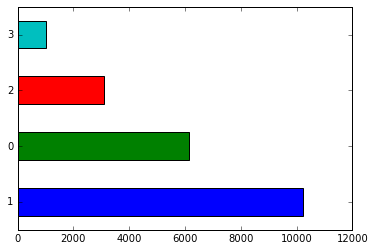

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(df['education']))
mapped_education.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))
categorical_columns = df.columns[df.dtypes == 'object'].union(['education'])
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

# Корреляция признаков
Для анализа данных необходимо вывести и оценить корреляцию всех признаков и корреляцию признаков с целевым признаком (churn)

In [13]:
print 'Матрица корреляция всех признаков:\n', df.iloc[:, :].corr()
print '\n'
print 'Матрица корреляций целевого признака (churn) со всеми остальными:\n', df.iloc[:,0:-1].corrwith(df.iloc[:, -1])

Матрица корреляция всех признаков:
                                           age  annualincome  calldroprate  \
age                                   1.000000     -0.007526     -0.010608   
annualincome                         -0.007526      1.000000     -0.005619   
calldroprate                         -0.010608     -0.005619      1.000000   
callfailurerate                       0.003599      0.003480     -0.009011   
callingnum                            0.000963      0.004645      0.006820   
customerid                           -0.006130     -0.004494     -0.004261   
customersuspended                     0.004381     -0.008141      0.006424   
education                            -0.008546     -0.001554      0.004429   
gender                                0.043036     -0.002300      0.088261   
homeowner                             0.000808      0.014100     -0.000330   
maritalstatus                        -0.011790     -0.001180     -0.002272   
monthlybilledamount          

# Импорт библиотек
Импортируем scale и shuffle для стандартиризации и перемешивания данных. Так как разные признаки имеют разный порядок величины и для корректной работы необходимо нормировать их на отрезке [0;1].

In [14]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

# Подготовка данных
y - целевая признак (вектор-столбец)
x - матрица признаков (без целевого признака) 

In [15]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["churn"]

C:\Users\Ravin\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


# Кросс-валидация

In [17]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

C:\Users\Ravin\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Выбор модели
Для предсказания оттока клиентов будем использовать 3 модели:
1. Метод опорных векторов
2. Случайный лес
3. К-ближайших соседей
В дальнейшем проведем сравнение этих моделей и выберем ту, которая будет лучше предсказывать отток клиентов.

In [18]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(X,y,SVC))
print "Random forest:"
print "%.3f" % accuracy(y, run_cv(X,y,RF))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(y, run_cv(X,y,KNN))

Support vector machines:
0.909
Random forest:
0.899
K-nearest-neighbors:
0.904


# Препроцессинг для построения матрицы ошибок

In [34]:
from sklearn.metrics import confusion_matrix

y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    confusion_matrix(y,run_cv(X,y,SVC)),
    confusion_matrix(y,run_cv(X,y,RF)),
    confusion_matrix(y,run_cv(X,y,KNN))
]

In [29]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Сравнение разных моделей
Сравниваем разные модели используя для этого точность и полноту. Это важный критерий для данной задачи потому, что необходимо точно (чем точнее, тем лучше) предсказывать отношение правильно спрогнозированных уходов к общему количеству уходов (recall). А также, отношение количества правильно спрогнозированных уходов к общему количеству спрогнозированных уходов.
Ниже приведена матрица ошибок.

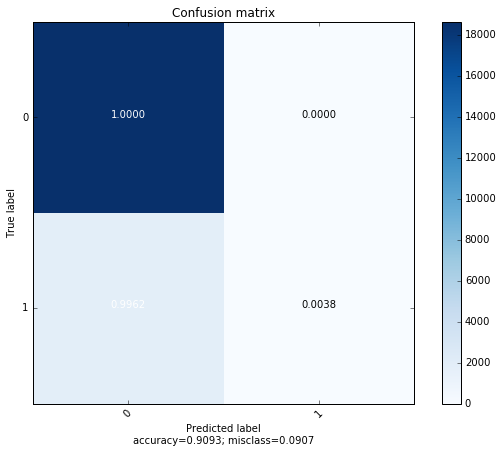

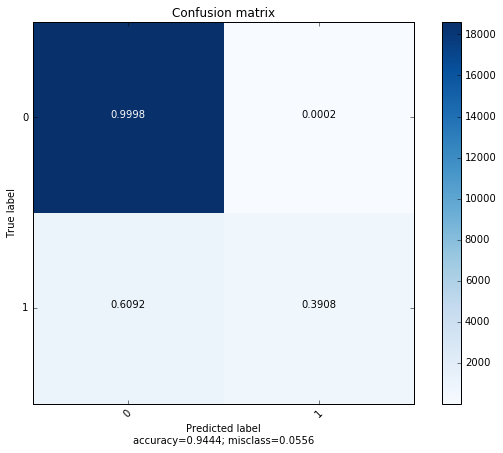

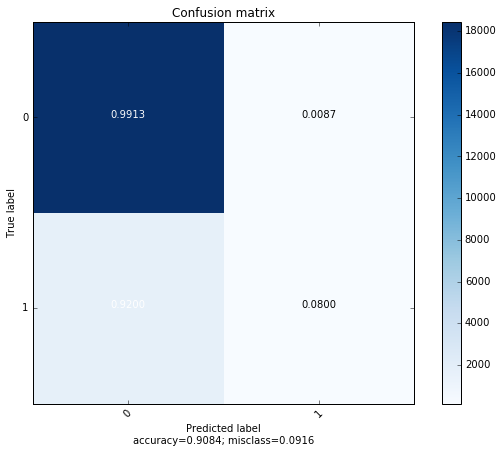

In [35]:

%matplotlib inline

plot_confusion_matrix(confusion_matrices[0],class_names)
plot_confusion_matrix(confusion_matrices[1],class_names)
plot_confusion_matrix(confusion_matrices[2],class_names)

# Заключение
Важным моментов в данной задаче является то, что нужно точно предсказывать клиентов, которые уйдут, чтобы предотвратить отток. Если же модель предскажет, что клиент уйдет, а он самом деле останется, то в этом ничего плохого нет.
Как видно из сравнения, лучше всего отток клиентов моделируется с помощью Random Forest (случайный лес). Recall = 39%, precision = 99,9%. 